<a href="https://www.kaggle.com/code/orestasdulinskas/bank-churn-classification?scriptVersionId=159761953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![bank](https://storage.googleapis.com/unbiased-www-production-backend/uploads/media/news/0001/04/thumb_3364_news_standard.jpeg)

# Bank Churn Classification
---

## Background
This data science project aims to leverage a comprehensive banking dataset to predict customer churn. Churn, in this context, refers to customers leaving the bank during a specified period. The dataset includes various features such as customer demographics (e.g., age, gender, country), financial information (credit score, balance), and banking-related attributes (tenure, product usage). Through rigorous analysis and machine learning modeling, the project seeks to identify key factors influencing customer churn, ultimately providing insights that can inform strategic retention efforts and enhance customer satisfaction.

## Objective
The primary objective of this project is to develop a predictive model that accurately anticipates customer churn based on the provided dataset. By employing machine learning algorithms and statistical analysis, the project aims to uncover patterns and relationships within the data. Specifically, it intends to answer questions such as:

Which features strongly correlate with customer churn?
Are there demographic factors (e.g., age, gender) that significantly impact churn rates?
Can machine learning models accurately predict which customers are more likely to churn?
The overarching goal is to empower the bank with actionable insights to proactively address potential churners, optimize customer retention strategies, and improve overall customer satisfaction.

## Data
The dataset consists of the following features:

* Customer ID (unused variable)
* Credit score
* Country
* Gender
* Age
* Tenure
* Balance
* Products number
* Credit card usage
* Active membership status
* Estimated salary
* Churn (target variable: 1 if the customer has left the bank, 0 otherwise)

The dataset provides a comprehensive view of customer behavior and attributes, offering the necessary information for building a robust predictive model. Initial exploration will involve assessing data quality, identifying patterns, and gaining insights into the factors influencing customer churn. The dataset will be split into training and testing sets for model development and evaluation. The project will follow a systematic approach to data preprocessing, model selection, and performance evaluation to achieve the defined objectives.

# Data Cleaning
---

In [1]:
import pandas as pd

path = r'/kaggle/input/playground-series-s4e1/train.csv'
df = pd.read_csv(path)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [2]:
df.info() # Summary of DataFrame information

print('\nNumber of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

print('\nNumber of missing values in each column')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

Number of unique values in each column
id - 165034
CustomerId - 23221
Sur

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [4]:
# Print the unique values and the percentage of each in 'Exited' column
print('Distribution of the Exited customers in the dataset')
print(df['Exited'].unique())
print(df['Exited'].unique()[0],' - ', round(df['Exited'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print(df['Exited'].unique()[1],' - ', round(df['Exited'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Distribution of the Exited customers in the dataset
[0 1]
0  -  78.84 % of the dataset
1  -  21.16 % of the dataset


### Summary

There are no "Null" values, so we don't have to work on ways to replace values

Most of the customers have Not Exited (78.84%) of the time, while customers that have exited ahve been (21.16%) of the time in the dataframe

# Exploratory Data Analysis
---

### Categorical features

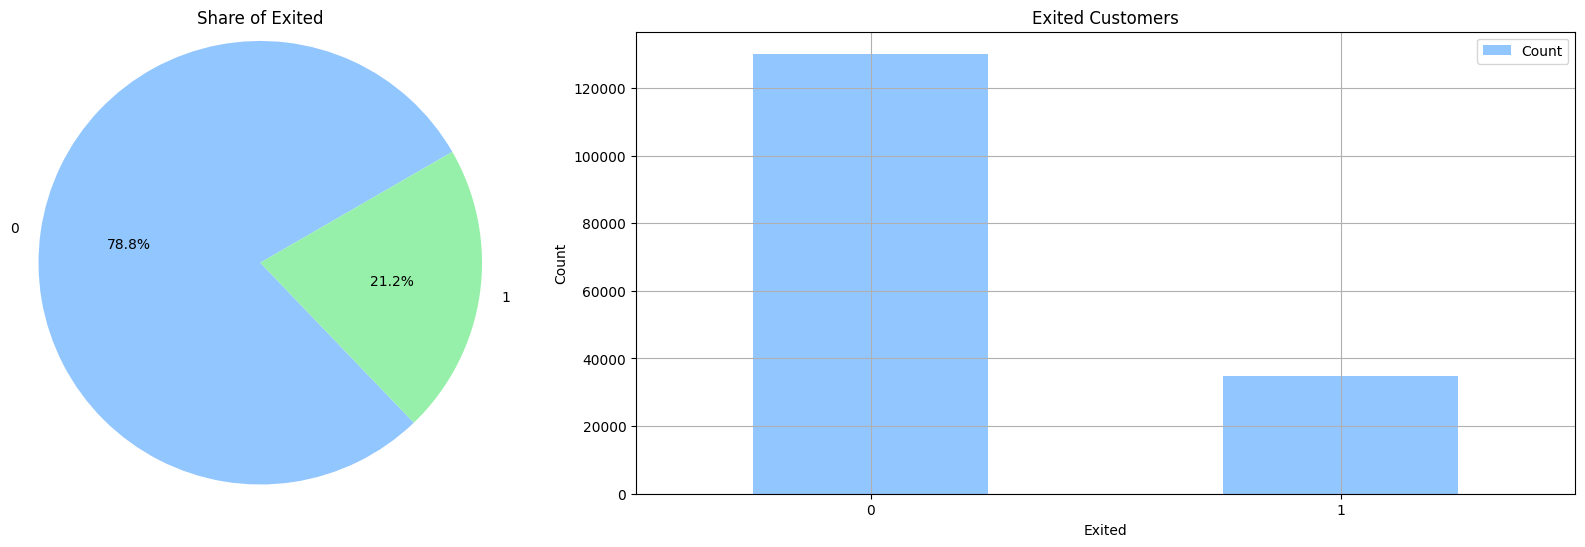

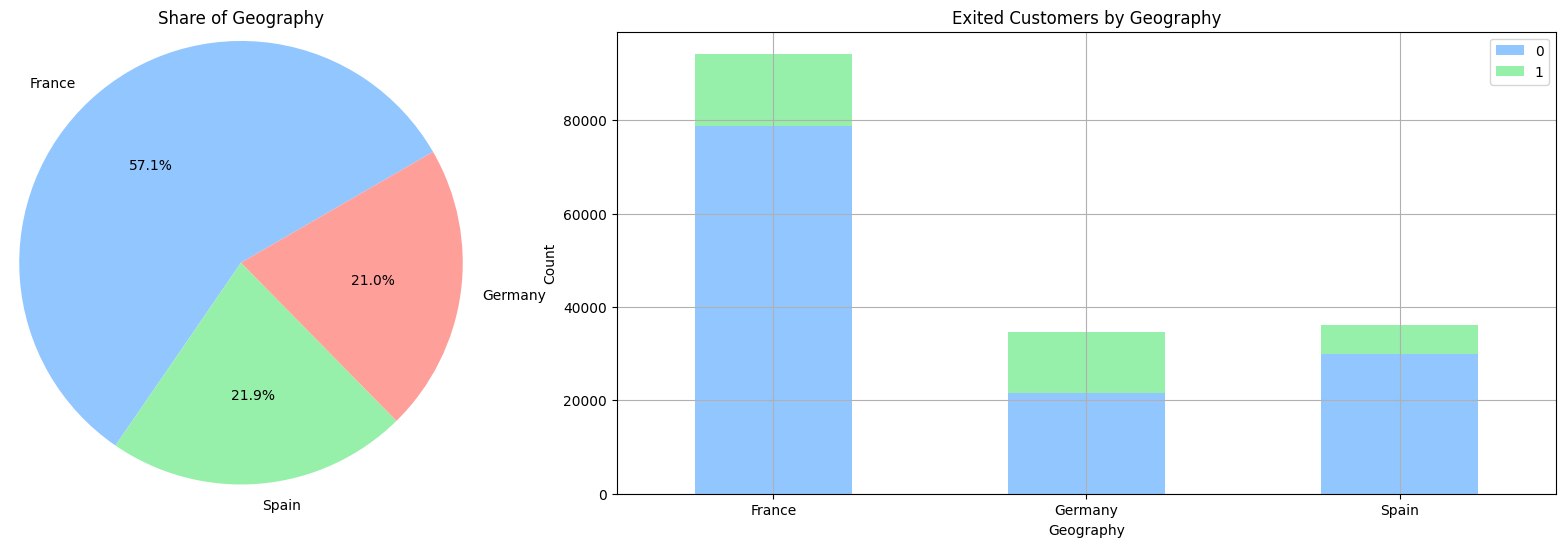

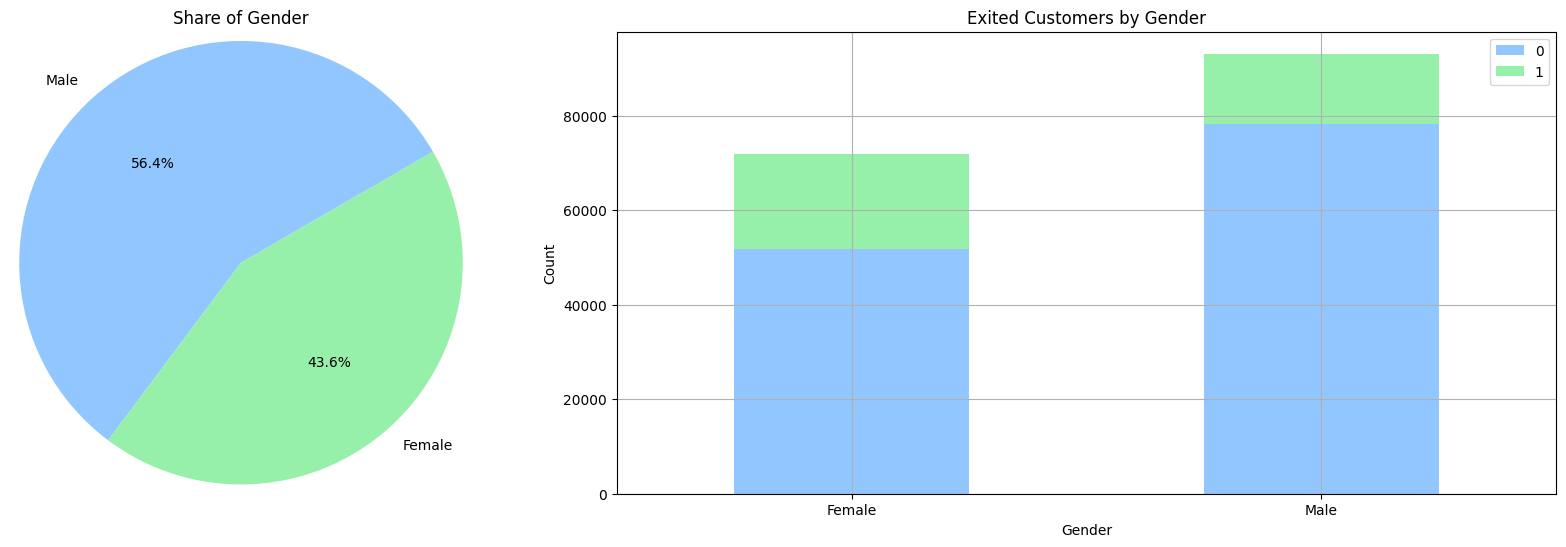

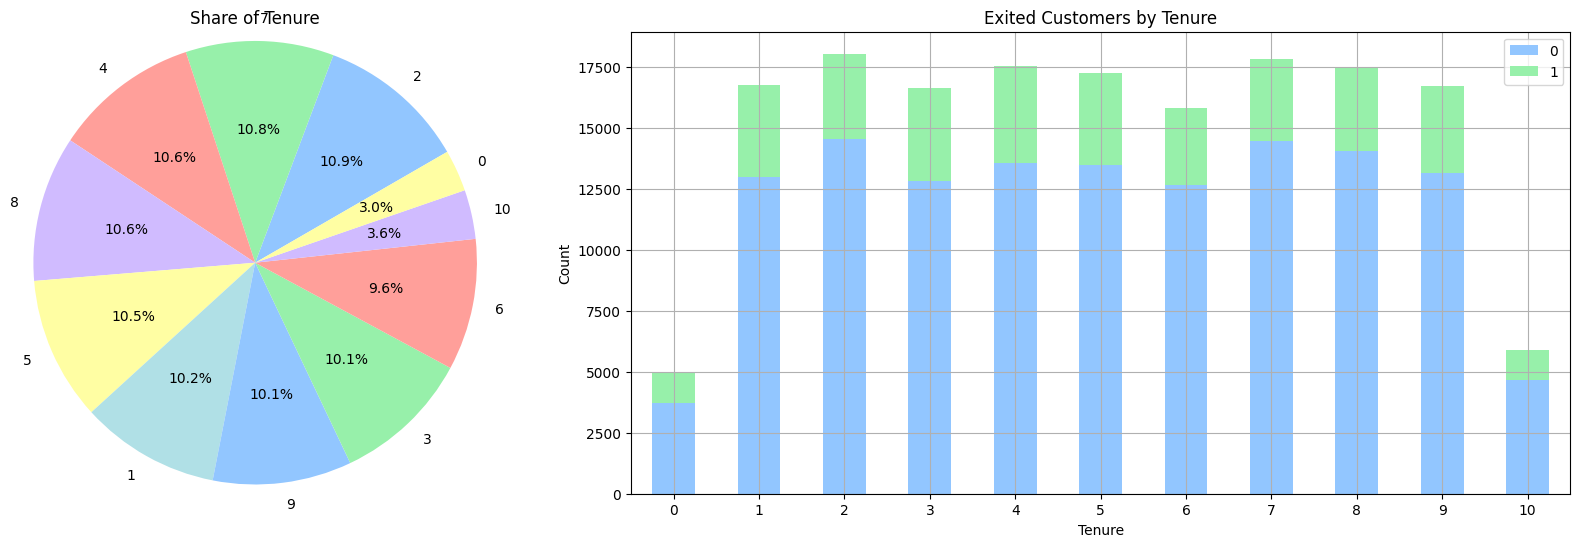

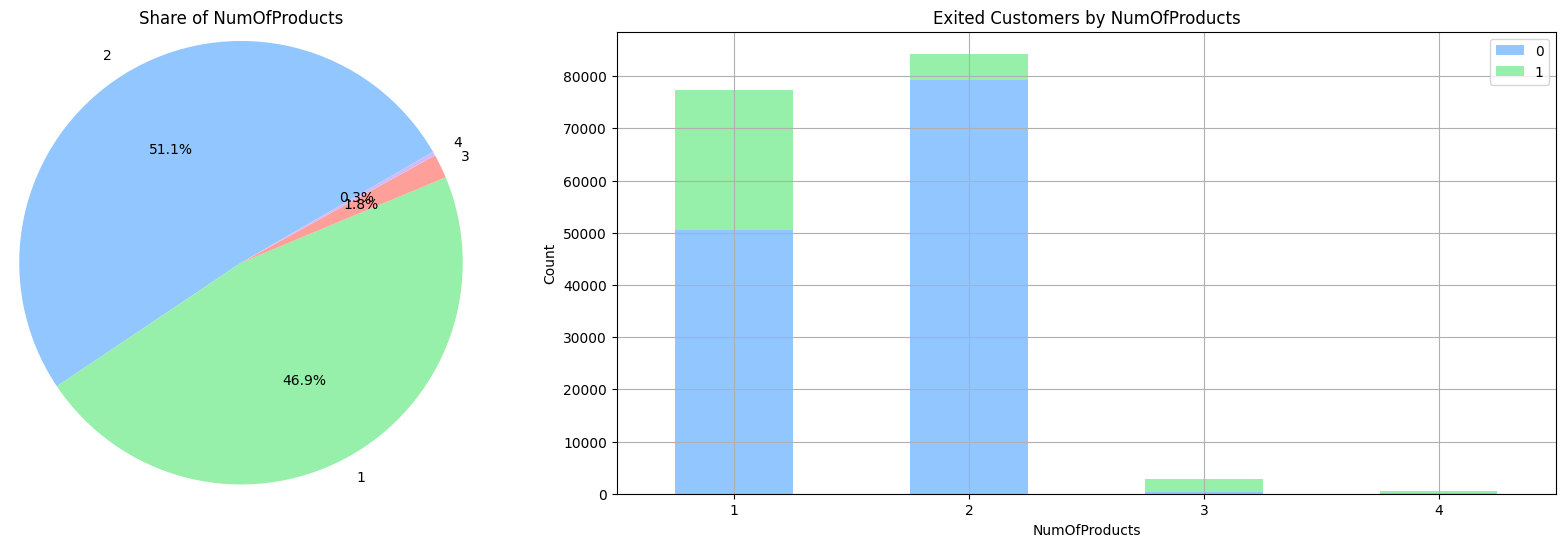

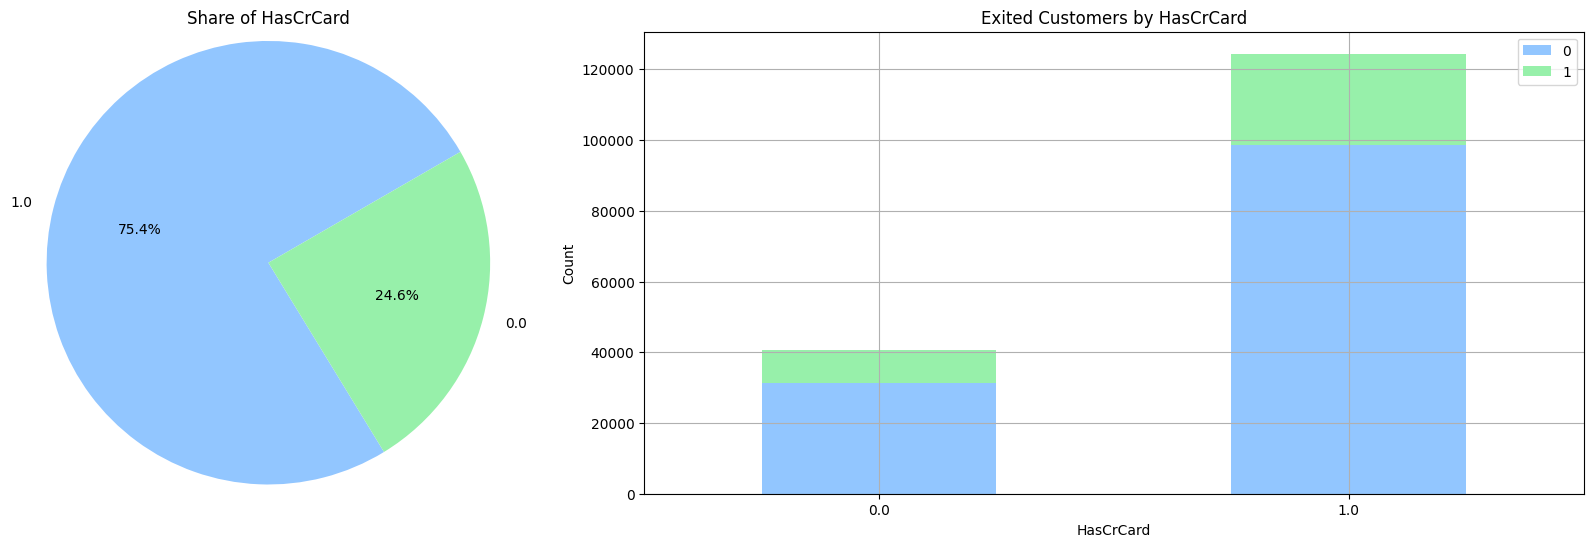

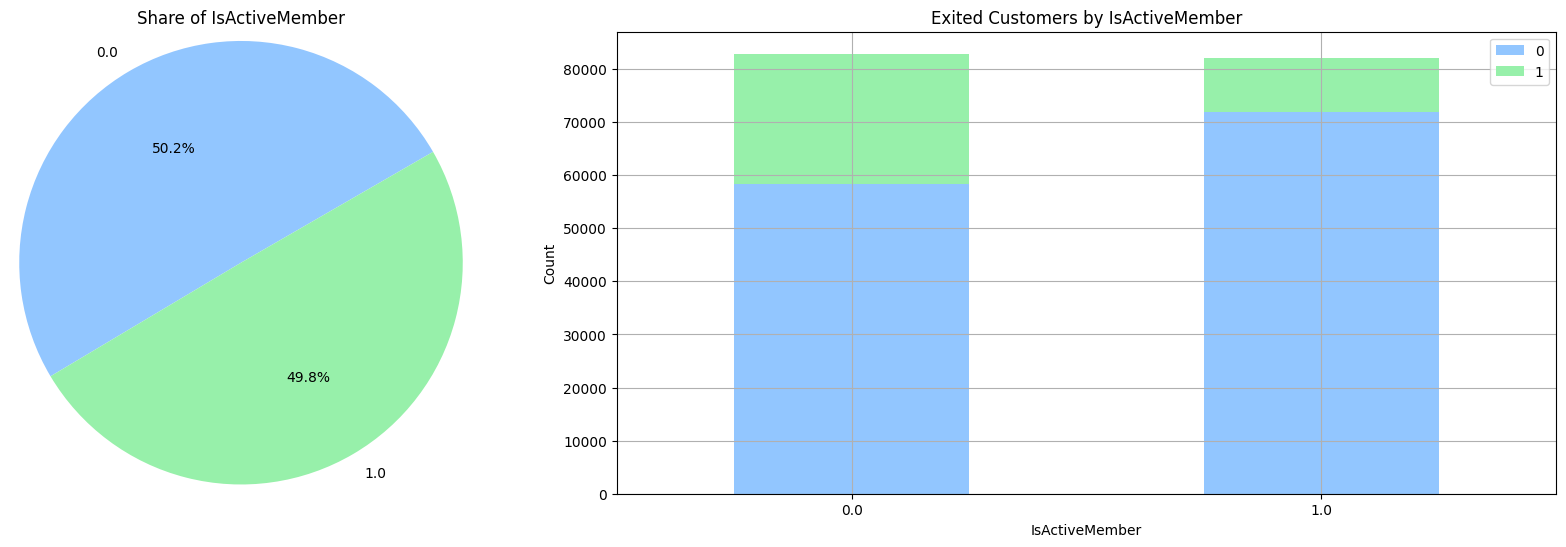

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

for i in ['Exited', 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    fig, axs = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]})
    
    # Pie Chart
    ax1 = axs[0]
    subject = df[i].value_counts().reset_index(name='Count')
    ax1.pie(subject['Count'], labels=subject[i], autopct='%1.1f%%', radius=1.2, startangle=30)
    ax1.set_title(f'Share of {i}')
    
    # Bar Chart
    ax2 = axs[1]
    try:
        subject = df.groupby([i, 'Exited']).size().reset_index(name='Count')
        pivot_df = subject.pivot(index=i, columns='Exited', values='Count')
        pivot_df.plot(kind='bar', stacked=True, ax=ax2)
        ax2.legend(loc="upper right")
        ax2.set_title(f'Exited Customers by {i}')
    except ValueError:
        subject.plot(kind='bar', x='Exited', ax=ax2)
        ax2.set_title('Exited Customers')
    ax2.set_xlabel(i)
    ax2.set_ylabel('Count')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    ax2.grid(True)

    plt.show()

#### Some Observations:
Upon analyzing the dataset, it becomes evident that the variables `IsActiveMember`, `Tenure`, and `Gender` exhibit comparable distributions, suggesting potential interdependencies or correlations among them. This similarity may indicate that the tenure of a customer, their gender, and their active membership status might influence each other or share common patterns within the dataset. On the other hand, the variables `HasCrCard`, `NumOfProducts`, and `Geography` showcase distinct distributions, implying diverse patterns or characteristics associated with these features. The dissimilarity in distributions for `HasCrCard` suggests variations in the prevalence of credit card ownership among customers, while `NumOfProducts` indicates diverse product usage patterns. Additionally, `Geography`, representing the customer's location, manifests differences, suggesting that regional factors could play a significant role in shaping customer behaviors or preferences within the dataset.

### Continuous features

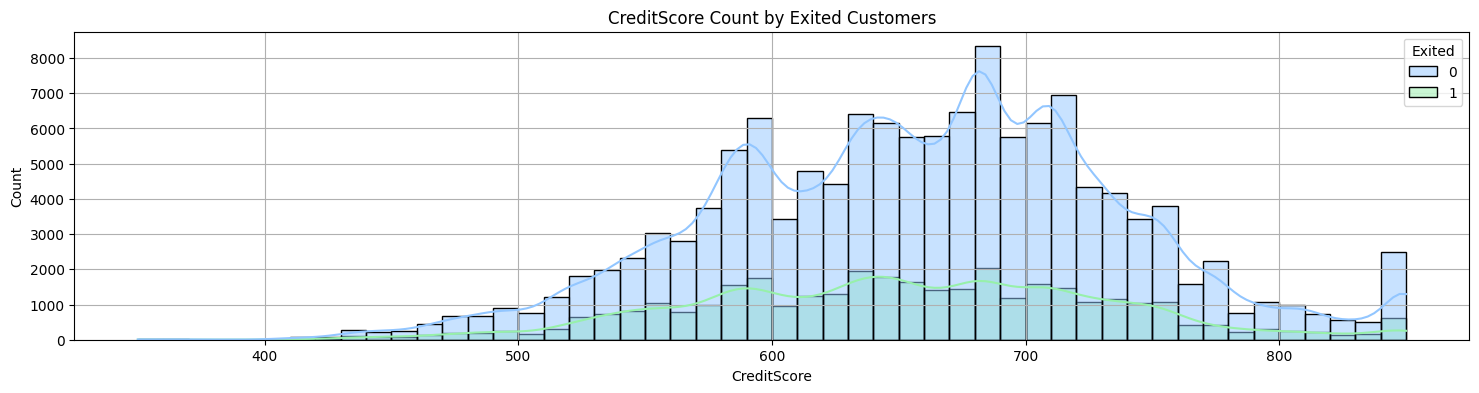

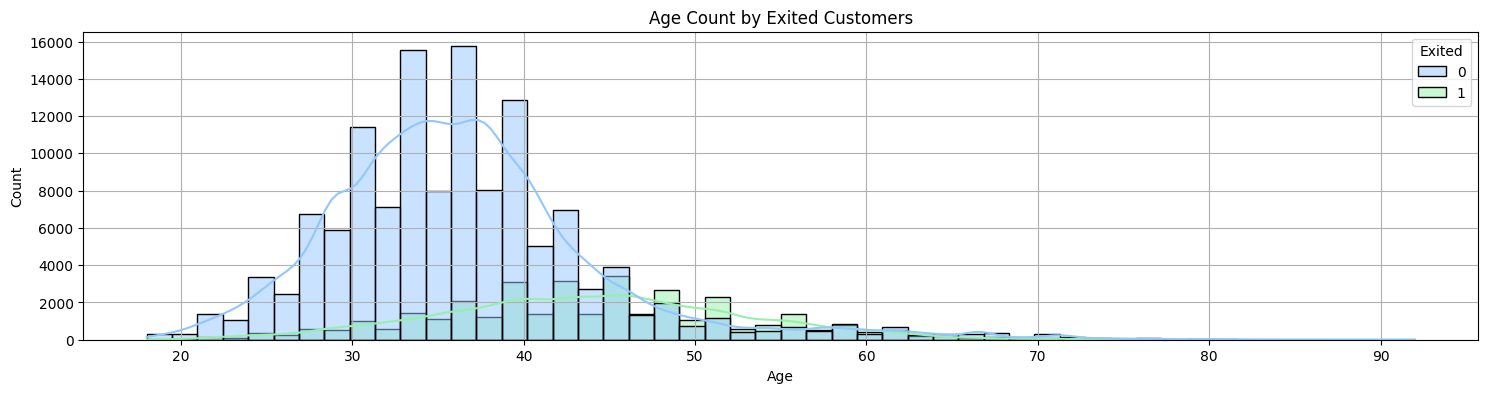

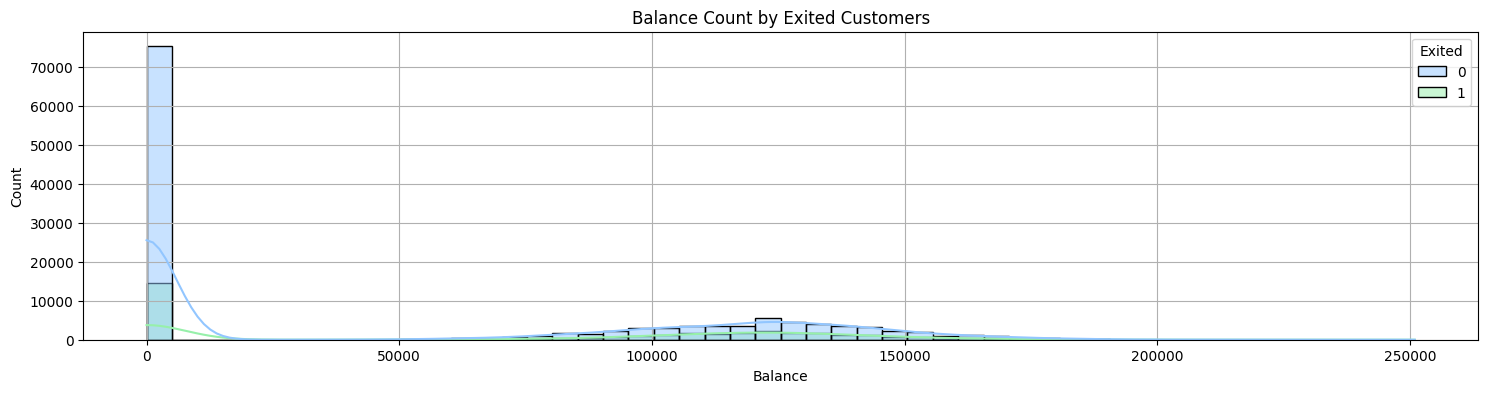

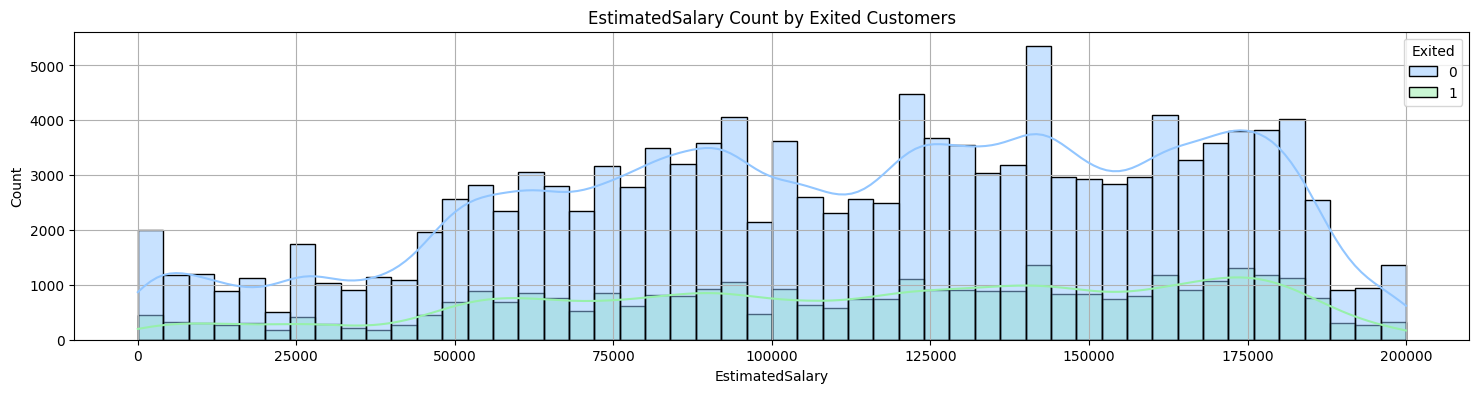

In [6]:
import seaborn as sns

for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=df, x=i, hue="Exited", bins=50, kde=True)
    fig.set_title(f'{i} Count by Exited Customers')
    fig.grid(True)
    plt.show()

### Some Observations:

The examination of the Continuous features of the dataset reveals distinctive characteristics in the distribution of variables. Notably, the `balance` variable displays a considerable number of 0 values, resulting in a leftward skewness, indicating a concentration of customers with zero balances. This concentration could signify a specific subgroup within the dataset, possibly those with no account activity or certain restrictions. Moreover, the distributions of the remaining variables also exhibit skewness, either to the left or the right, implying asymmetry in their patterns. Interestingly, both the Exited and Not Exited classes share similar distributions for all variables, suggesting that the factors influencing customer exit decisions are distributed similarly across the dataset.

### Multivariate features

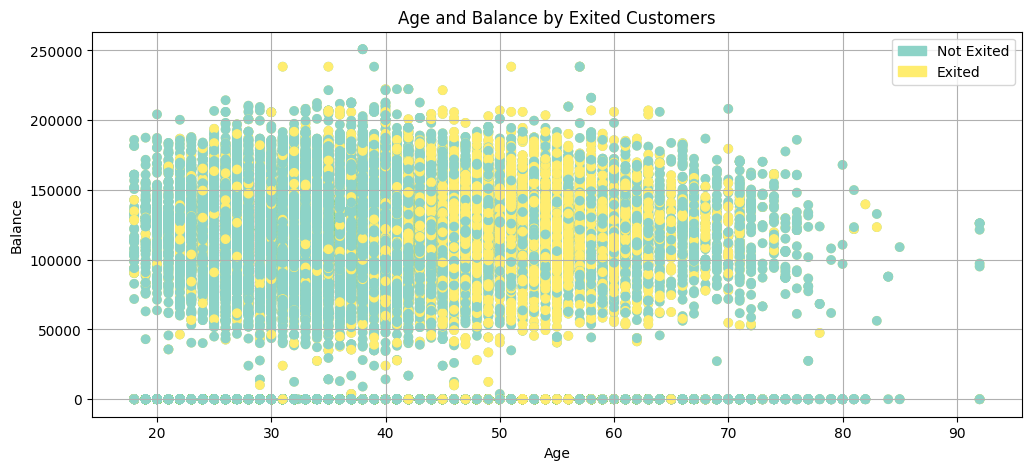

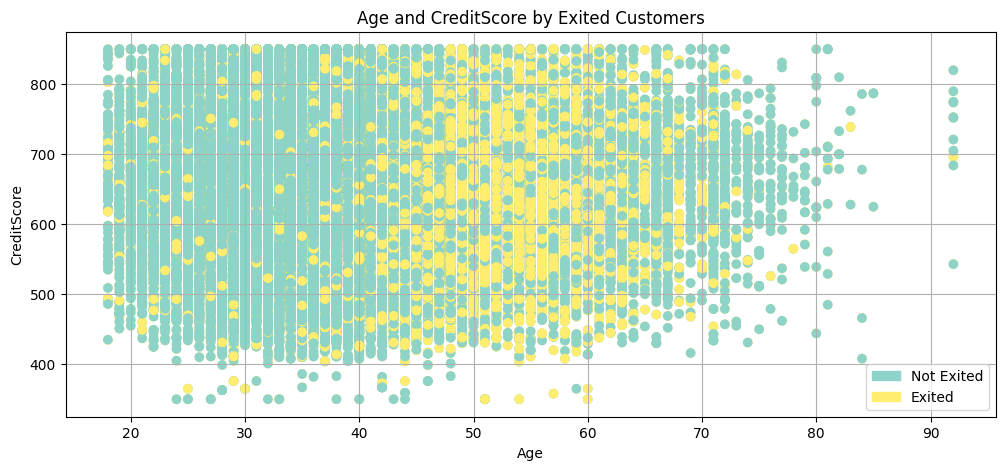

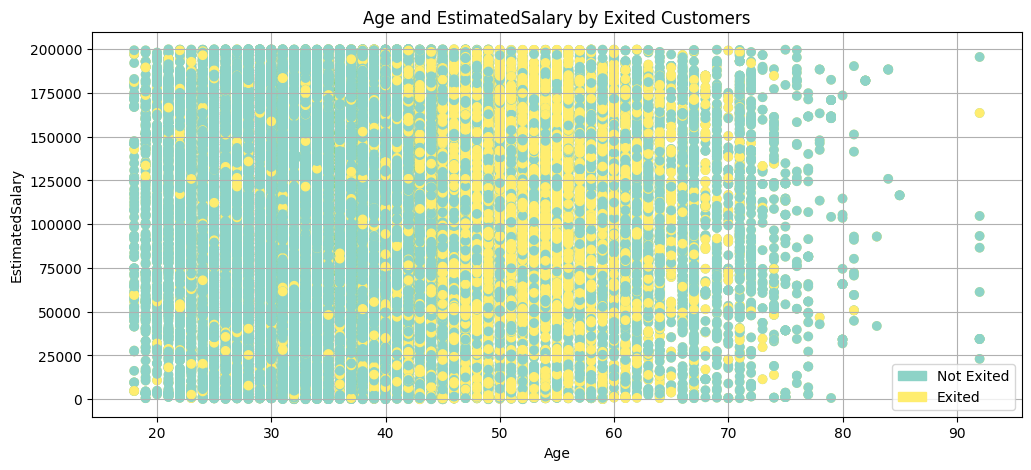

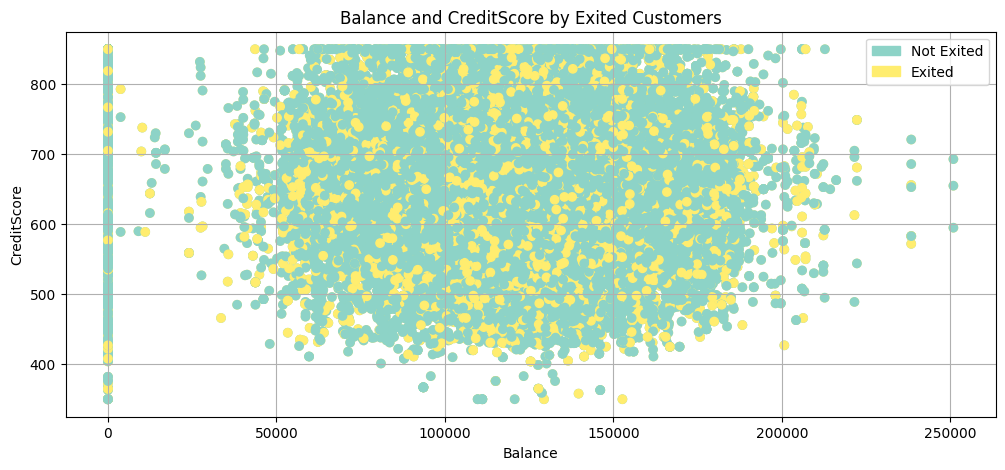

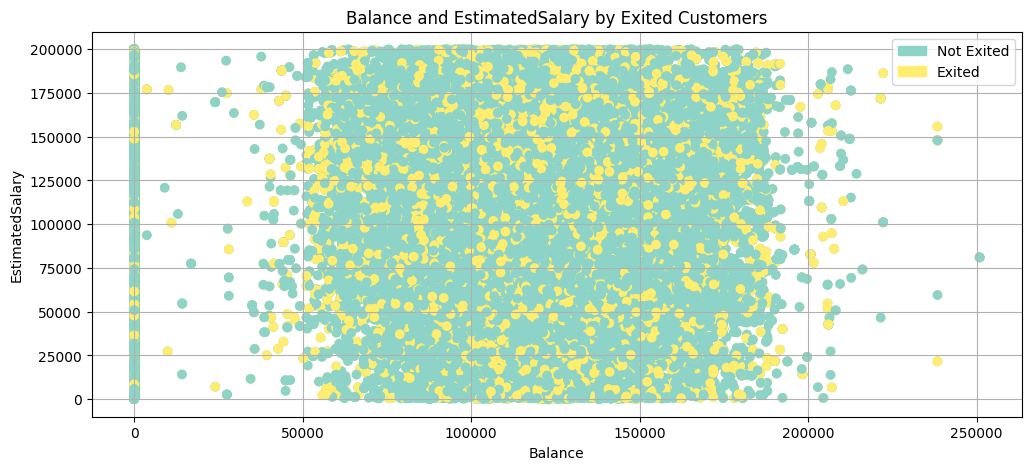

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


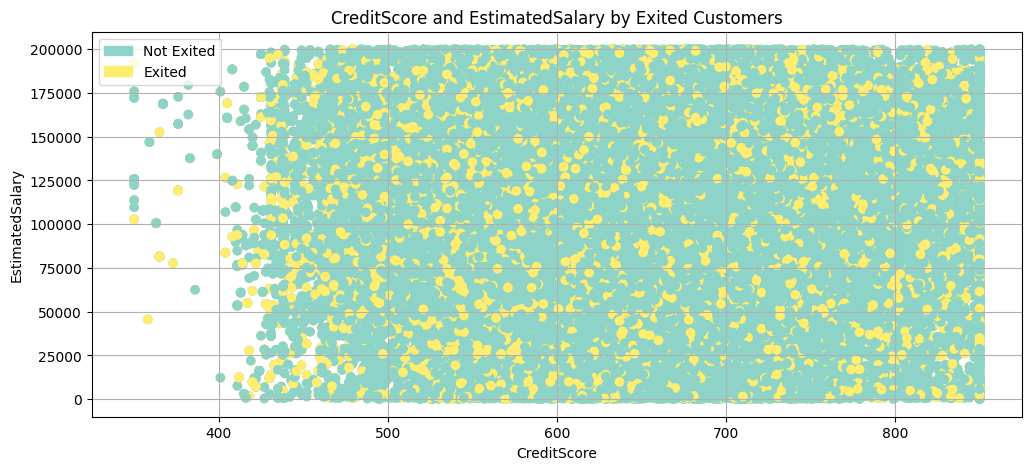

In [7]:
from itertools import combinations
import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='#8dd3c7', label='Not Exited')
yellow_patch = mpatches.Patch(color='#ffed6f', label='Exited')

for i, j in combinations(['Age', 'Balance', 'CreditScore', 'EstimatedSalary'], 2):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.scatter(df[i],df[j], c=(df['Exited'] == 0), label='Not Exited', cmap='Set3')
    plt.scatter(df[i],df[j], c=(df['Exited'] == 1), label='Exited', cmap='Set3')
    plt.legend(handles=[green_patch, yellow_patch])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.title(f'{i} and {j} by Exited Customers')
    plt.grid(True)
    plt.show()

# Pre-processing
---

#### Dropping irrelevant columns

In [8]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Applying label encoder to columns with string values

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[['Geography', 'Gender']] = df[['Geography', 'Gender']].apply(lambda col: le.fit_transform(col))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
# Count of unique values in 'Exited' column
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

#### Scaling the data with RobustScaler

In [11]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scaled_df = df.copy()

for column in scaled_df.columns:
    scaled_df[column] = rob_scaler.fit_transform(scaled_df[column].values.reshape(-1,1))

# Keeping Target values unscaled
scaled_df['Exited'] = df['Exited']
    
scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.079646,0.0,0.0,-0.4,-0.50,0.000000,0.0,0.0,0.0,0.788698,0
1,-0.283186,0.0,0.0,-0.4,-1.00,0.000000,0.0,0.0,1.0,-0.850085,0
2,0.168142,0.0,0.0,0.3,1.25,0.000000,0.0,0.0,0.0,0.831134,0
3,-0.690265,0.0,0.0,-0.3,-0.75,1.241313,-1.0,0.0,1.0,-0.414670,0
4,0.504425,2.0,0.0,-0.4,0.00,0.000000,0.0,0.0,1.0,-1.277766,0


#### Plotting a Heat map of correlations between different features in dataset

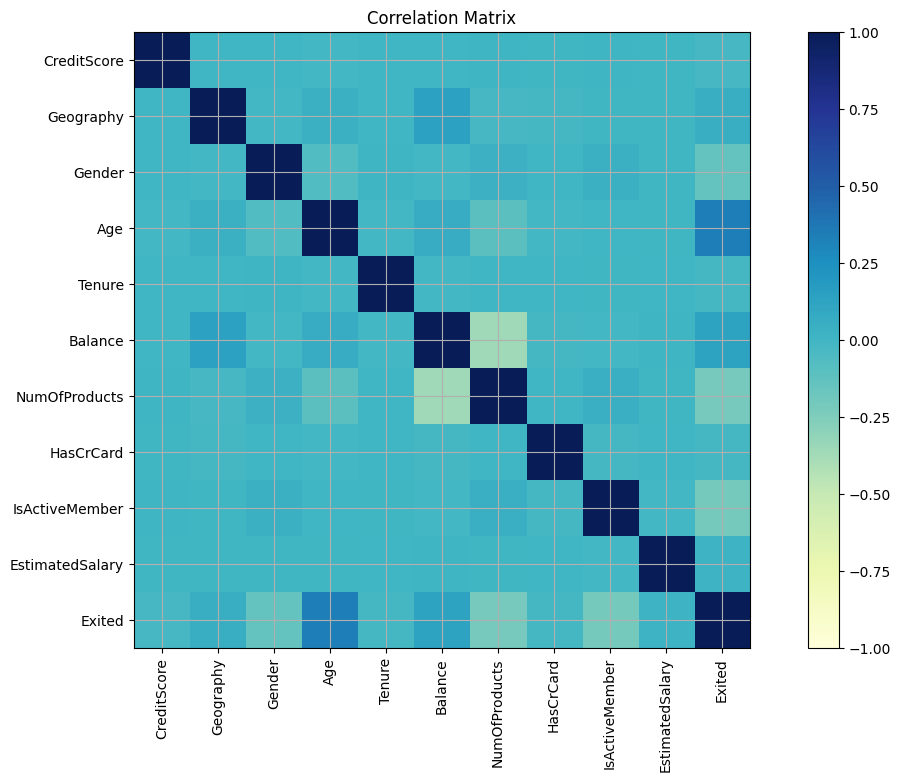

In [12]:
plt.figure(figsize=(15,8))

plt.imshow(scaled_df.corr(), cmap='YlGnBu', vmin=-1, vmax=1)
plt.xticks(range(len(scaled_df.corr().columns)), scaled_df.corr().columns, rotation=90)
plt.yticks(range(len(scaled_df.corr().columns)), scaled_df.corr().columns)
plt.colorbar()
plt.grid(True)
plt.title('Correlation Matrix')

plt.show()

The correlation matrix provides insights into the relationships between different variables in the dataset. Here, we observe several notable patterns. `CreditScore`, being the first variable, exhibits weak correlations with other features, indicating a lack of strong linear relationships. `Geography` and `Gender` also display relatively low correlations with other variables, suggesting limited linear dependence. `Age`, on the other hand, demonstrates a moderate positive correlation with `Exited`, indicating that older customers are more likely to leave the bank. The `NumOfProducts` variable has a substantial negative correlation with `Exited`, suggesting that customers with a higher number of products are less likely to churn. Additionally, the `IsActiveMember` variable shows a noteworthy negative correlation with `Exited`, implying that active members are less likely to leave the bank. The `Gender` variable exhibits a moderate negative correlation with `Age`, implying a slight tendency for older customers to be male. Overall, these correlation values offer valuable insights into potential relationships that can guide further analysis and feature selection in the context of predicting customer churn.

#### Correlation between the ‘Exited’ column and the other columns of the DataFrame

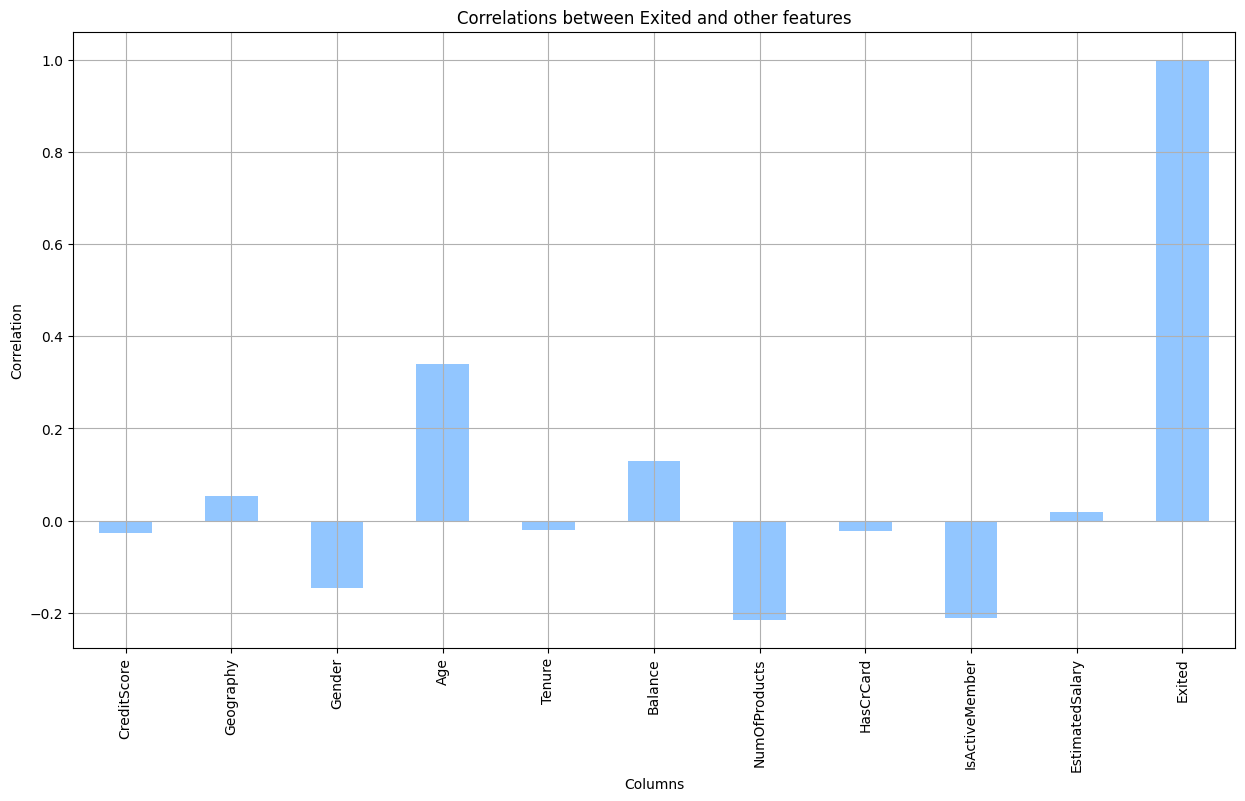

In [13]:
plt.figure(figsize=(15,8))

subject = scaled_df.corr()['Exited']
subject.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlations between Exited and other features')
plt.grid(True)

plt.show()

#### Plotting features with highest Positive and Negative Correlations

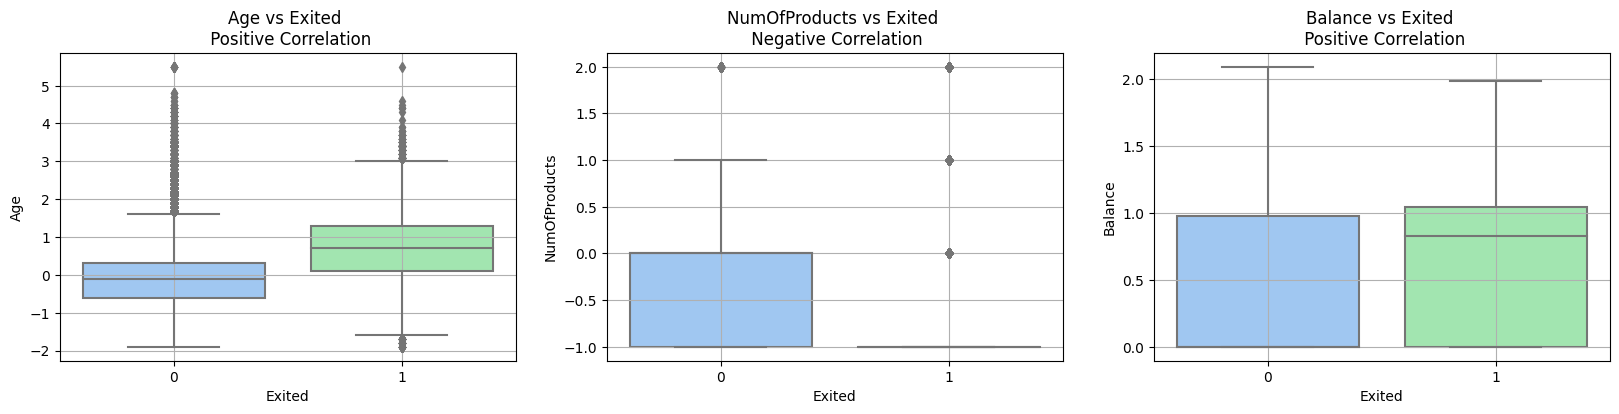

In [14]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="Exited", y="Age", data=scaled_df, ax=axes[0])
axes[0].set_title('Age vs Exited \n Positive Correlation')
axes[0].grid(True)

sns.boxplot(x="Exited", y="NumOfProducts", data=scaled_df, ax=axes[1])
axes[1].set_title('NumOfProducts vs Exited \n Negative Correlation')
axes[1].grid(True)

sns.boxplot(x="Exited", y="Balance", data=scaled_df, ax=axes[2])
axes[2].set_title('Balance vs Exited \n Positive Correlation')
axes[2].grid(True)

plt.show()

#### Plotting distributions for features that have highest Positive and Negative Correlations

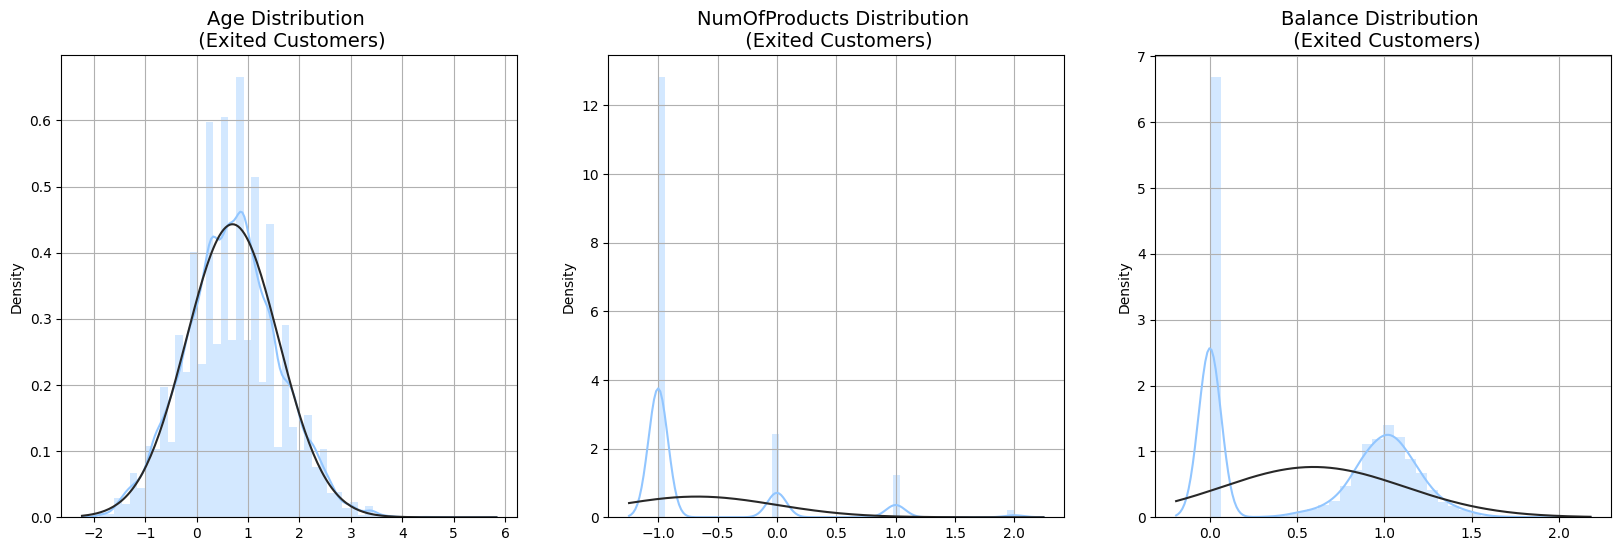

In [15]:
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

age_dist = scaled_df['Age'].loc[scaled_df['Exited'] == 1].values
sns.distplot(age_dist,ax=ax1, fit=norm)
ax1.set_title('Age Distribution \n (Exited Customers)', fontsize=14)
ax1.grid(True)

active_member_dist = scaled_df['NumOfProducts'].loc[scaled_df['Exited'] == 1].values
sns.distplot(active_member_dist,ax=ax2, fit=norm)
ax2.set_title('NumOfProducts Distribution \n (Exited Customers)', fontsize=14)
ax2.grid(True)

num_prod_dist = scaled_df['Balance'].loc[scaled_df['Exited'] == 1].values
sns.distplot(num_prod_dist,ax=ax3, fit=norm)
ax3.set_title('Balance Distribution \n (Exited Customers)', fontsize=14)
ax3.grid(True)

plt.show()

#### Performing Dimensionality Reduction with T-SNE, PCA and Truncated SVD

In [16]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = scaled_df.drop('Exited', axis=1)
y = scaled_df['Exited']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.8e+03 s
PCA took 0.69 s
Truncated SVD took 0.47 s


#### Plotting Dimensionality Reduction results

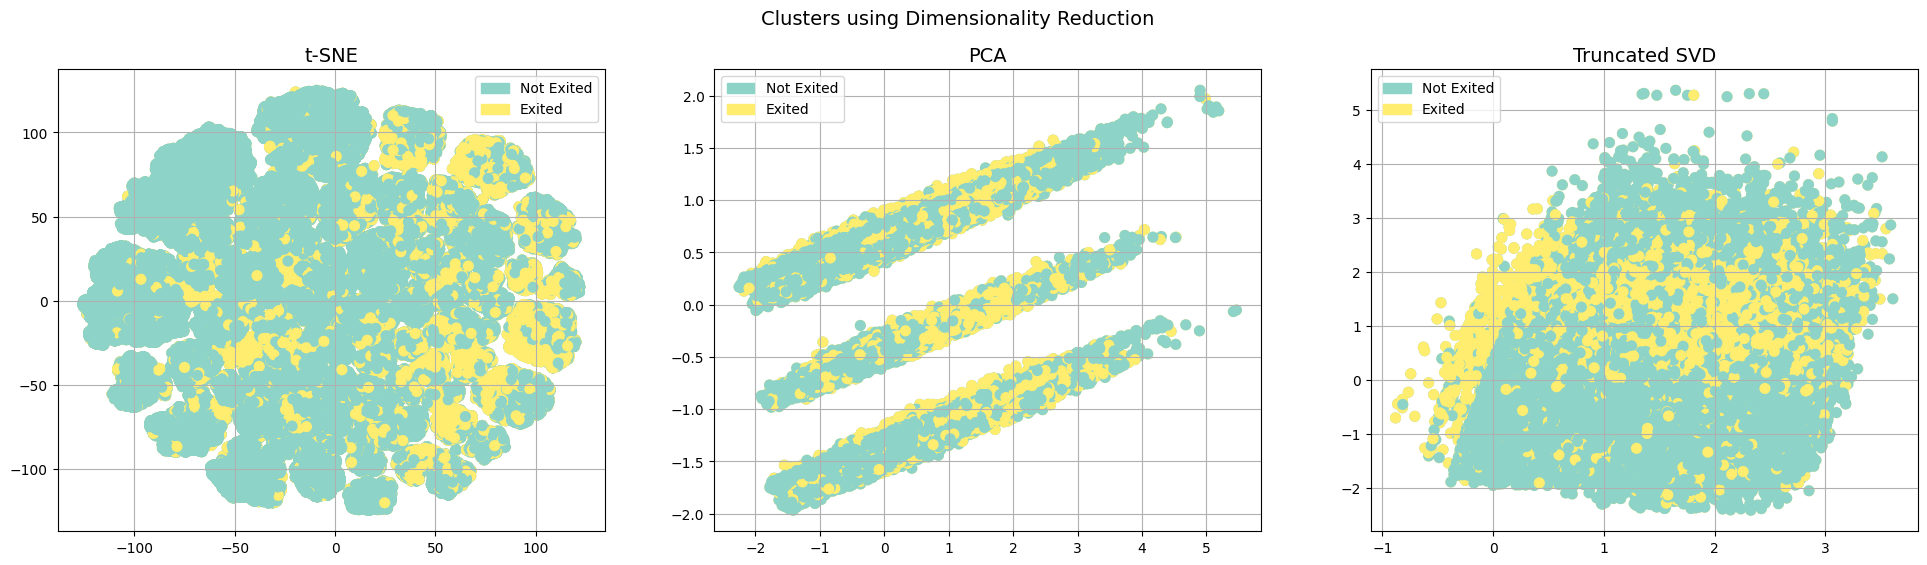

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

green_patch = mpatches.Patch(color='#8dd3c7', label='Not Exited')
yellow_patch = mpatches.Patch(color='#ffed6f', label='Exited')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), label='Not Exited', linewidths=2, cmap='Set3')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), label='Exited', linewidths=2, cmap='Set3')
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[green_patch, yellow_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), label='Not Exited', linewidths=2, cmap='Set3')
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), label='Exited', linewidths=2, cmap='Set3')
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[green_patch, yellow_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), label='Not Exited', linewidths=2, cmap='Set3')
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), label='Exited', linewidths=2, cmap='Set3')
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[green_patch, yellow_patch])

plt.show()

T-SNE appears to be effective in capturing non-linear relationships and revealing distinct clusters of exited values. PCA, with its linear nature, may not fully capture the complexities of the data, as evidenced by the more uniform distribution in its plot. Truncated SVD, while linear, seems to identify linear combinations that exhibit a stronger association with churn, as indicated by the concentrated distribution of exited values on its plot. These observations highlight the strengths and limitations of different dimensionality reduction techniques in revealing underlying patterns within the dataset.

# Training and Validation
---

#### Splitting data into Training and Validation sets (70/30)

In [18]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(['Exited'], axis=1)
y = scaled_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Defining Classifier models with its respective hyperparameters

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisiticRegression": {'model':LogisticRegression(), 'params':{'penalty': ['l1', 'l2', 'elasticnet', None],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'max_iter': [10000],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    
    "KNearest": {'model':KNeighborsClassifier(), 'params':{'n_neighbors': [1, 5, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}},
    
    "DecisionTreeClassifier": {'model':DecisionTreeClassifier(), 'params':{'criterion': ['gini', 'entropy'],
                'max_depth': [1, 2, 3, 4, 5, 10, None],
                'min_samples_split': [2, 5, 10, 15, 20]}},
    
    "Random Forest Classifier": {'model':RandomForestClassifier(), 'params':{'n_estimators': [10, 20, 50, 100],
                'bootstrap': [True, False],
                "max_depth": [None],
                "min_samples_split": [2, 5, 7, 10],
                "min_samples_leaf": [1, 3, 6, 9],
                "max_features": ["sqrt"]}},
    
    "XGBoost Classifier": {'model':XGBClassifier(objective='binary:logistic'), 'params':{'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2],
                'max_depth': [4, 5, 6, 7],
                'reg_lambda': [0, 1.0, 10.0],
                'scale_pos_weight': [1, 3, 5],
                'colsample_bytree': [0.5, 0.6, 0.7],
                'scale_pos_weight': [1, 3, 5]}}
}

#### Training each model without hyperparameters specified

Training LogisticRegression
LogisticRegression has a training score of 80.87 % accuracy score 

Training KNeighborsClassifier
KNeighborsClassifier has a training score of 82.66 % accuracy score 

Training DecisionTreeClassifier
DecisionTreeClassifier has a training score of 70.37 % accuracy score 

Training RandomForestClassifier
RandomForestClassifier has a training score of 87.4 % accuracy score 

Training XGBClassifier
[0]	validation_0-auc:0.87322
[1]	validation_0-auc:0.87863
[2]	validation_0-auc:0.88155
[3]	validation_0-auc:0.88253
[4]	validation_0-auc:0.88333
[5]	validation_0-auc:0.88404
[6]	validation_0-auc:0.88486
[7]	validation_0-auc:0.88547
[8]	validation_0-auc:0.88577
[9]	validation_0-auc:0.88605
[10]	validation_0-auc:0.88628
[11]	validation_0-auc:0.88641
[12]	validation_0-auc:0.88648
[13]	validation_0-auc:0.88656
[14]	validation_0-auc:0.88659
[15]	validation_0-auc:0.88676
[16]	validation_0-auc:0.88682
[17]	validation_0-auc:0.88692
[18]	validation_0-auc:0.88682
[19]	validatio

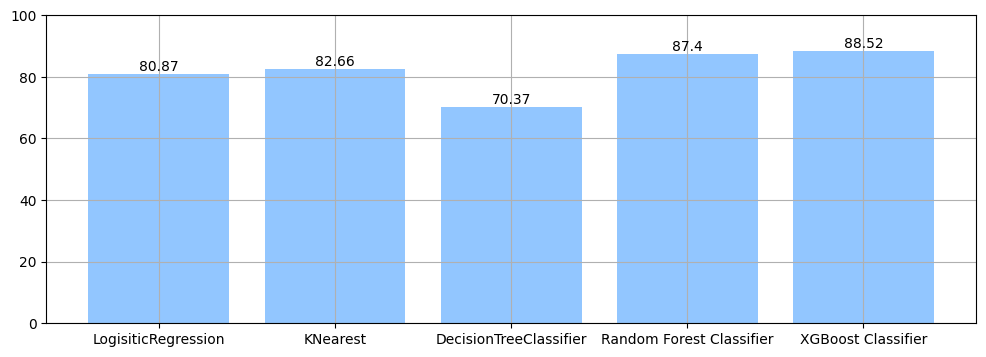

In [20]:
from sklearn.model_selection import cross_val_score

model_scores = {}
for key, classifier in classifiers.items():
    print('Training', classifier['model'].__class__.__name__)
    try:
        classifier['model'].fit(X_train, y_train, 
                early_stopping_rounds=10,
                eval_metric='auc',
                eval_set=[(X_test, y_test)])
    except TypeError:
        classifier['model'].fit(X_train, y_train)
    training_score = cross_val_score(classifier['model'], X_train, y_train, cv=5, scoring='roc_auc')
    model_scores[key] = round(training_score.mean() * 100, 2)
    print(classifier['model'].__class__.__name__, "has a training score of", round(training_score.mean() * 100, 2), "% accuracy score \n")

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(model_scores.keys(), model_scores.values())
ax.bar_label(bars, label_type="edge")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

#### Training best performing models with hyperparameters

Training XGBoost Classifier
XGBoost Classifier Cross Validation Score 89.01% 

Training Random Forest Classifier
Random Forest Classifier Cross Validation Score 88.53% 



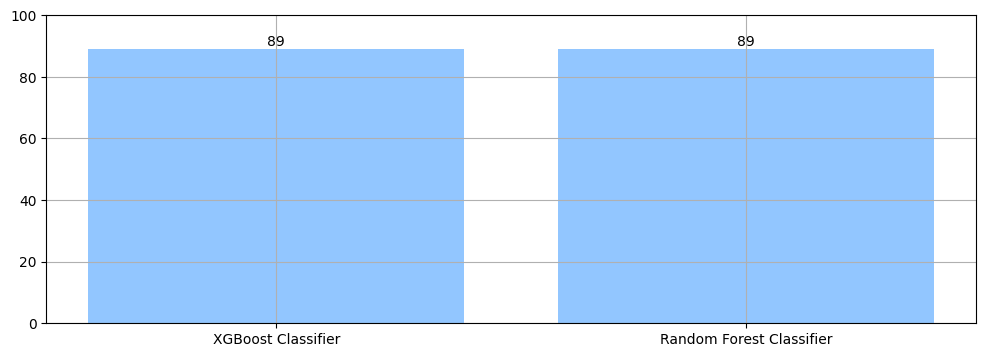

In [21]:
from sklearn.model_selection import GridSearchCV

best_models = [item[0] for item in sorted(model_scores.items(), key=lambda item: item[1], reverse=True)[:2]]

grid_models = {}
model_grid_scores = {}

for model in best_models:
    print('Training', model)
    grid = GridSearchCV(classifiers[model]['model'], classifiers[model]['params'],
                        scoring='roc_auc',
                        n_jobs=10,
                        cv=3)
    grid.fit(X_train, y_train)

    best = grid.best_estimator_
    grid_models[model] = best
    score = cross_val_score(best, X_train, y_train, cv=5, scoring='roc_auc')
    model_grid_scores[model] = round(score.mean(), 2) * 100
    print(model, 'Cross Validation Score', round(score.mean() * 100, 2).astype(str) + '% \n')
    
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(model_grid_scores.keys(), model_grid_scores.values())
ax.bar_label(bars, label_type="edge")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

#### Generating and Plotting learning curves

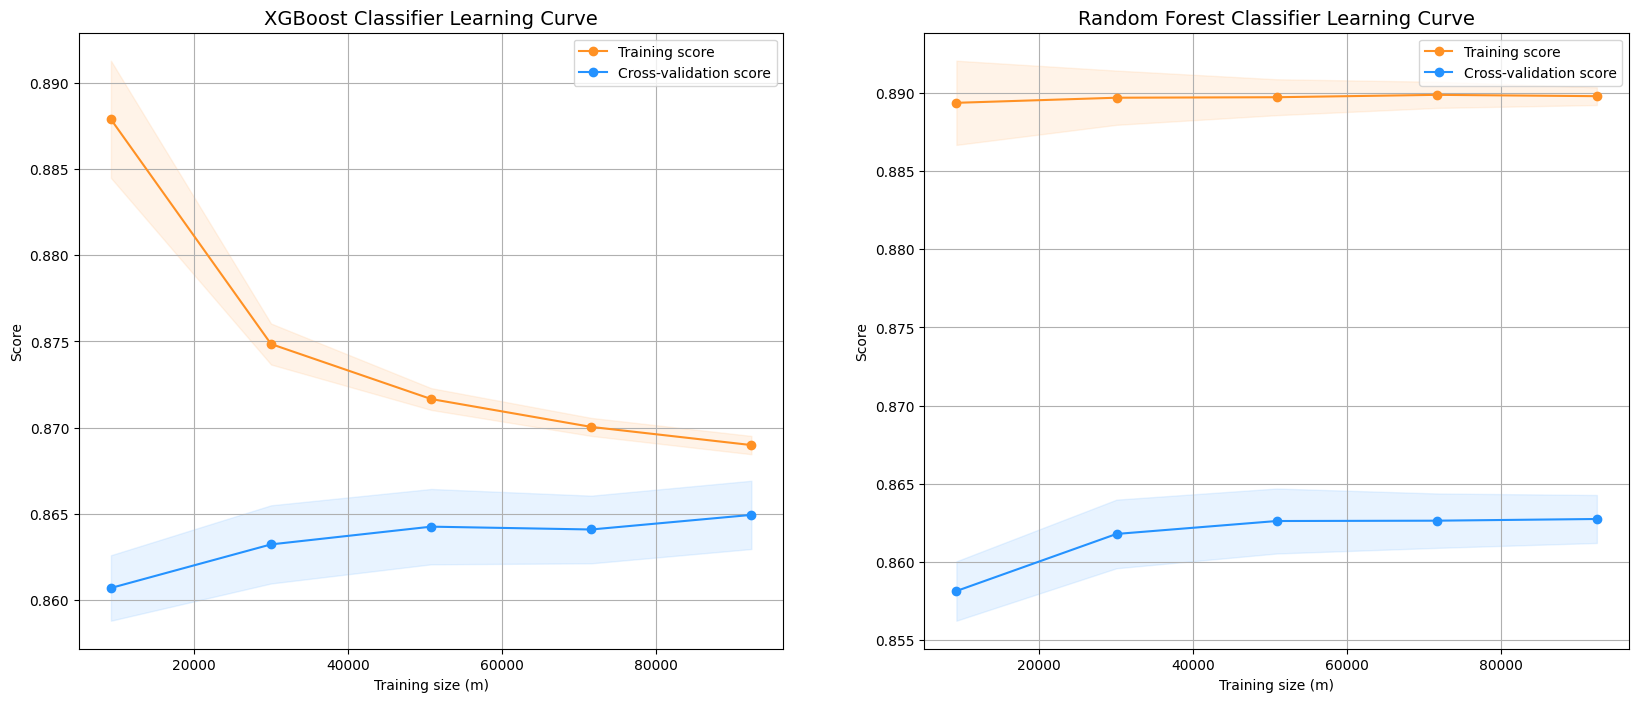

In [22]:
from sklearn.model_selection import ShuffleSplit, learning_curve
import numpy as np

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

fig, axs = plt.subplots(1,2, figsize=(20, 8))

for model, ax in zip(grid_models, [axs[0], axs[1]]):
    train_sizes, train_scores, test_scores = learning_curve(
        grid_models[model], X_train, y_train, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax.set_title(f"{model} Learning Curve", fontsize=14)
    ax.set_xlabel('Training size (m)')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")

#### Performing cross-validated predictions

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

preds = {}
for model in grid_models:
    preds[model + 'prediction'] = cross_val_predict(grid_models[model], X_train, y_train, cv=5, verbose=2)
    print(model, ': ', roc_auc_score(y_train, preds[model + 'prediction']))

XGBoost Classifier :  0.7511443690044614
Random Forest Classifier :  0.7458453674532273


#### Plotting ROC curve

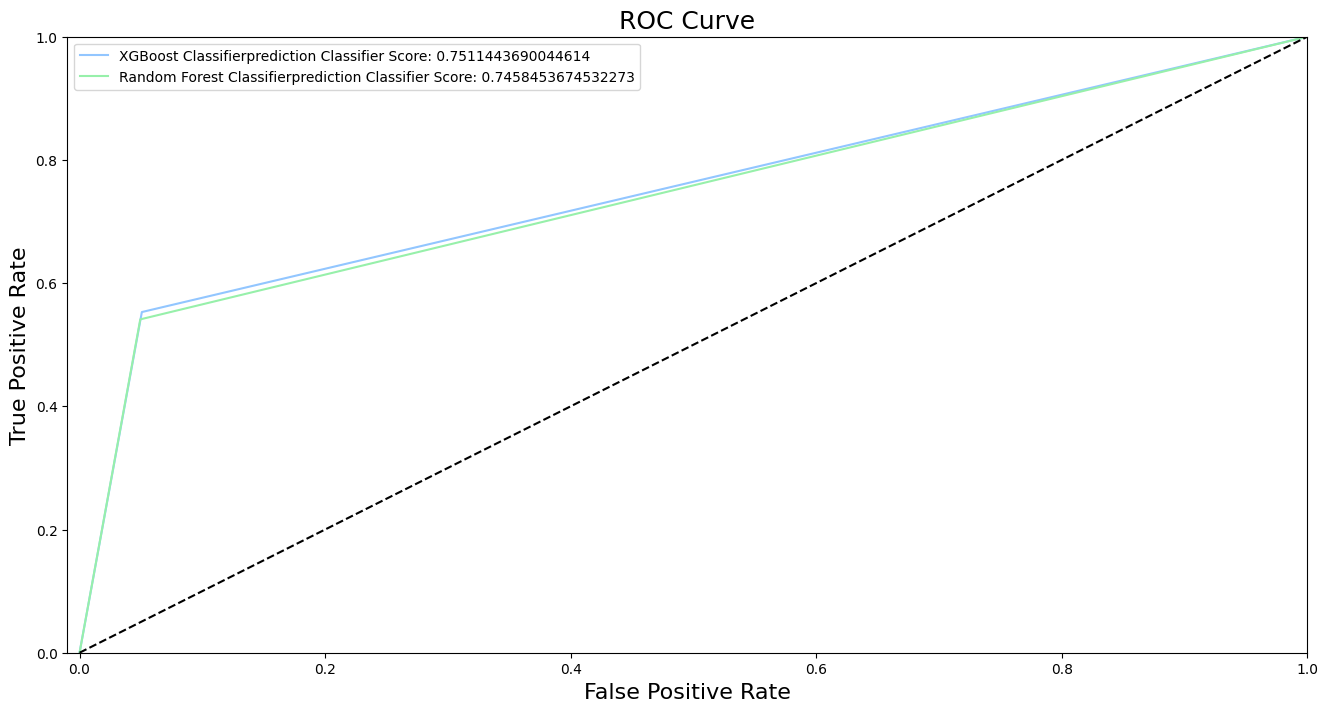

In [24]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresold1 = roc_curve(y_train, list(preds.values())[0])
fpr2, tpr2, threshold2 = roc_curve(y_train, list(preds.values())[1])

plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(fpr1, tpr1, label=f'{list(preds.keys())[0]} Classifier Score: {roc_auc_score(y_train, list(preds.values())[0])}')
plt.plot(fpr2, tpr2, label=f'{list(preds.keys())[1]} Classifier Score: {roc_auc_score(y_train, list(preds.values())[1])}')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

#### Plotting Confusion Matrices

1  -  79.05 % of the dataset
0  -  20.95 % of the dataset


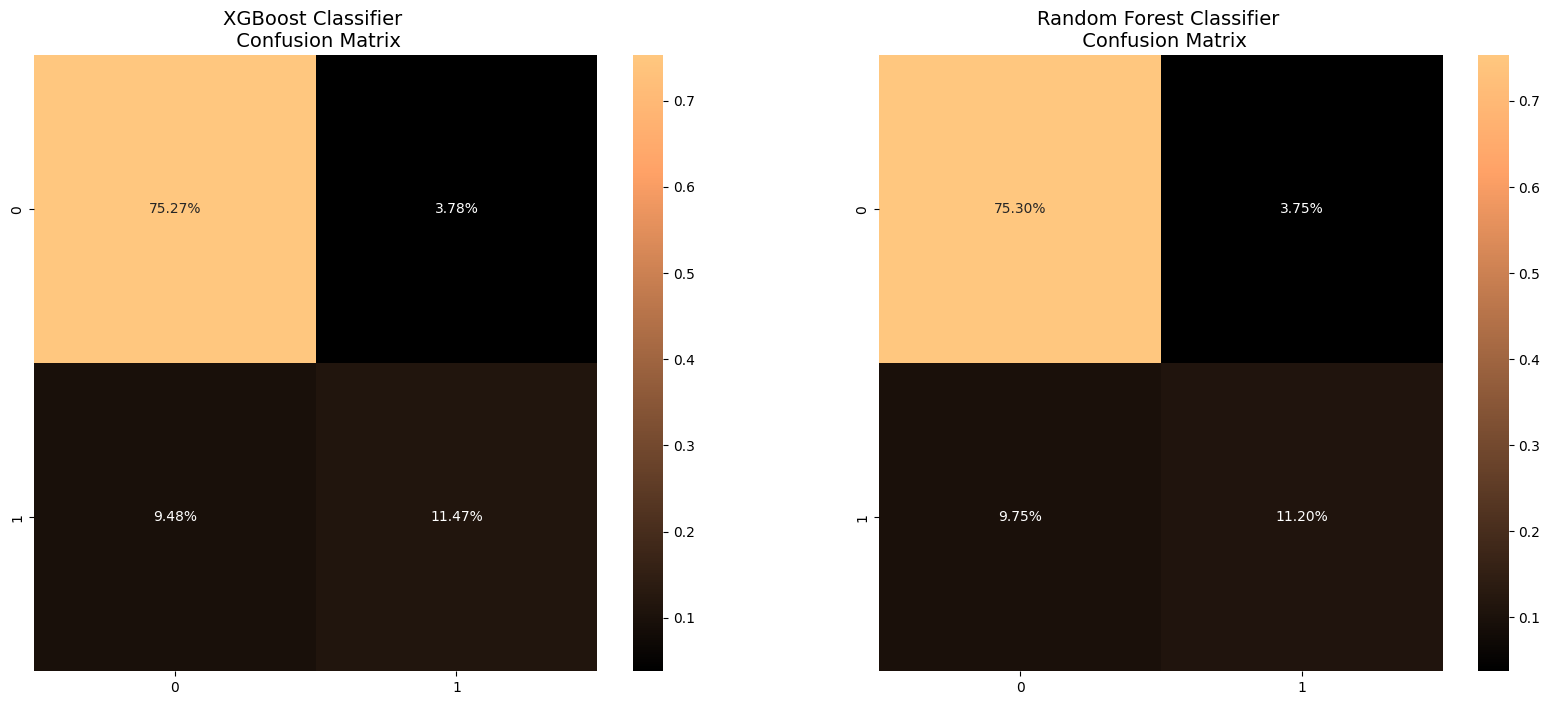

In [25]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1,2, figsize=(20,8))

print(y_test.unique()[0],' - ', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset')
print(y_test.unique()[1],' - ', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset')

proba_preds = {}
for model, ax in zip(grid_models, [axs[0], axs[1]]):
    y_pred = grid_models[model].predict(X_test)
    proba_preds[model] = y_pred
    cf_matrix = confusion_matrix(y_test, y_pred, normalize='all')

    sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap=plt.cm.copper, ax=ax)
    ax.set_title(f"{model} \n Confusion Matrix", fontsize=14)

plt.show()

# Performing predictions on Test data
---

#### Importing Data

In [26]:
path = r'/kaggle/input/playground-series-s4e1/test.csv'
df_test = pd.read_csv(path)
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [27]:
print('\nNumber of missing values in each column')
df_test.isnull().sum()


Number of missing values in each column


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

#### Applying Label encoder on columns with string values

In [28]:
le = LabelEncoder()
df_test_proc = df_test.copy().drop(['id', 'CustomerId', 'Surname'], axis=1)
df_test_proc[['Geography', 'Gender']] = df_test_proc[['Geography', 'Gender']].apply(lambda col: le.fit_transform(col))

#### Scaling the data with RobustScaler

In [29]:
rob_scaler = RobustScaler()

scaled_test_df = df_test_proc.copy()

for column in scaled_test_df.columns:
    scaled_test_df[column] = rob_scaler.fit_transform(scaled_test_df[column].values.reshape(-1,1))
    
scaled_test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.654867,0.0,-1.0,-1.4,-0.75,0.000000,0.0,-1.0,1.0,0.538022
1,0.203540,0.0,-1.0,0.9,-0.75,0.000000,-1.0,0.0,0.0,-0.564689
2,-0.035398,0.0,-1.0,-0.3,0.50,0.000000,0.0,0.0,0.0,0.262496
3,0.185841,0.0,0.0,-0.1,0.75,0.000000,-1.0,0.0,0.0,-0.048642
4,0.814159,1.0,0.0,0.1,1.25,1.009306,-1.0,0.0,0.0,0.269341


#### Making predcitions on Test data using best performing model

In [30]:
results = grid_models['XGBoost Classifier'].predict_proba(scaled_test_df)[:, 1]

#### Placing predictions into a DataFrame with corresponding id values

In [31]:
submission = pd.DataFrame({'Exited':results}, index=df_test['id'])
print(submission)

          Exited
id              
165034  0.025710
165035  0.816206
165036  0.029168
165037  0.230353
165038  0.322062
...          ...
275052  0.045527
275053  0.110493
275054  0.019907
275055  0.141028
275056  0.173148

[110023 rows x 1 columns]


#### Exporting predictions

In [32]:
submission.to_csv('submission.csv')